**Extracting dataset from kaggle API**

In [1]:
# Installing kaggle library

!pip install kaggle

In [2]:
# configuring the parth of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Importing the Summer Analytics First Hackathon from kaggle

!kaggle competitions download -c summer-analytics-mid-hackathon

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 464MB/s]


In [4]:
!ls

kaggle.json  sample_data  summer-analytics-mid-hackathon.zip


In [5]:
# Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/summer-analytics-mid-hackathon.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn. preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Loading Training Dataset**

In [7]:
# Loading the dataset to Pandas DataFrame

df = pd.read_csv('/content/hacktrain.csv')
print(df.shape)

(8000, 30)


In [8]:
# First 5 row of the dataframe

df.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [10]:
# Drop 'Unnamed: 0', 'ID' and 'class' column from the dataset

numeric_df = df.drop(['Unnamed: 0','ID', 'class'], axis = 1)
print(numeric_df.shape)

(8000, 27)


In [11]:
# Find the missing values
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,560
20150602_N,1200
20150517_N,800
20150501_N,960
20150415_N,480
20150330_N,1120
20150314_N,720


In [12]:
# Finding the median value for numerical_df columns

mean = numeric_df.mean()
print(mean)
print(len(mean))

20150720_N    5845.476916
20150602_N    4868.091395
20150517_N    4469.837748
20150501_N    5193.485086
20150415_N    2927.586705
20150330_N    4924.493648
20150314_N    3313.881373
20150226_N    4987.520158
20150210_N    4320.961814
20150125_N    5237.037739
20150109_N    2217.826698
20141117_N    3262.549896
20141101_N    2613.621603
20141016_N    2801.923271
20140930_N    2416.228527
20140813_N    1570.869960
20140626_N    2990.753932
20140610_N    4872.681670
20140525_N    3674.886731
20140509_N    3012.178524
20140423_N    3055.167358
20140407_N    2041.316792
20140322_N    2799.820342
20140218_N    2144.360224
20140202_N    6259.064275
20140117_N    2629.203972
20140101_N    2578.449870
dtype: float64
27


**Handling the Missing Values**

In [13]:
df[numeric_df.columns] = numeric_df.fillna(mean)

In [14]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0


In [15]:
print(df.shape)

(8000, 30)


**Encoding the categorical column**

In [16]:
df['class'].value_counts()

,count
class,
forest,6159
farm,841
impervious,669
grass,196
water,105
orchard,30


In [17]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [18]:
df['class'].value_counts()

,count
class,
1,6159
0,841
3,669
2,196
5,105
4,30


**Separating Features and Target**

In [19]:
X = df.drop(columns = ['ID', 'class'], axis = 1)
y = df['class']

In [20]:
print(X.shape)
print(y.shape)

(8000, 28)
(8000,)


**Splitting the data into Training and Validation data**

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [22]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6400, 28)
(1600, 28)
(6400,)
(1600,)


In [23]:
# Initialize scaler

scaler = StandardScaler()

In [24]:
#Fit on training data, transform both train and validation

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

**Model Training**

**Logistic Regression**

In [25]:
model = LogisticRegression(
        multi_class = 'multinomial',
        solver = 'lbfgs',
        max_iter= 100
)

In [26]:
# Training the Logistic Regression model with training data

model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

**Model Evaluation**

In [27]:
# Accuracy on training data

X_train_prediction = model.predict(X_train_scaled)
print(X_train_prediction)

[1 1 1 ... 1 3 0]


In [28]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of validation data:',training_data_accuracy)

Accuracy score of validation data: 0.965625


In [29]:
# Accuracy on Validation data

X_val_prediction = model.predict(X_val_scaled)

val_data_accuracy = accuracy_score(y_val, X_val_prediction)
print('Accuracy score of validation data: ',val_data_accuracy)

Accuracy score of validation data:  0.963125


In [30]:
y_val_pred = model.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        farm       0.85      0.89      0.87       161
      forest       0.99      1.00      0.99      1231
       grass       0.94      0.79      0.86        43
  impervious       0.87      0.84      0.86       141
     orchard       0.33      0.17      0.22         6
       water       1.00      0.78      0.88        18

    accuracy                           0.96      1600
   macro avg       0.83      0.74      0.78      1600
weighted avg       0.96      0.96      0.96      1600



**Importing the confusion matrix**

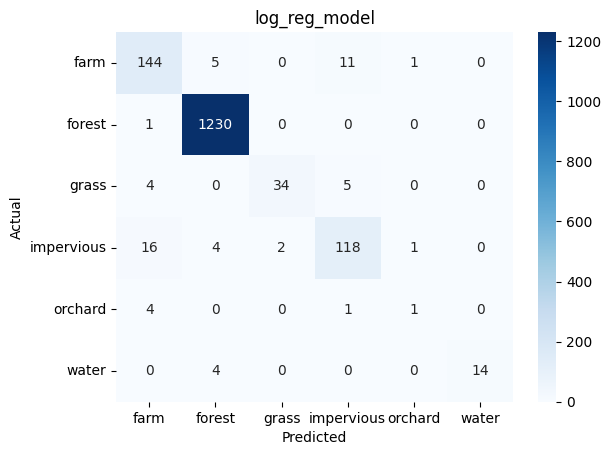

In [31]:
cm = confusion_matrix(y_val, X_val_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = le.classes_, yticklabels= le.classes_)
plt.title('log_reg_model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Loading Test dataset**

In [32]:
# Loading the test dataset to Pandas DataFrame

test_data = pd.read_csv('/content/hacktest.csv')
print(test_data.shape)

(2845, 29)


In [33]:
# print first 5 row of the dataset

test_data.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2845 non-null   int64  
 1   ID          2845 non-null   int64  
 2   20150720_N  2845 non-null   float64
 3   20150602_N  2845 non-null   float64
 4   20150517_N  2845 non-null   float64
 5   20150501_N  2845 non-null   float64
 6   20150415_N  2845 non-null   float64
 7   20150330_N  2845 non-null   float64
 8   20150314_N  2845 non-null   float64
 9   20150226_N  2845 non-null   float64
 10  20150210_N  2845 non-null   float64
 11  20150125_N  2845 non-null   float64
 12  20150109_N  2845 non-null   float64
 13  20141117_N  2845 non-null   float64
 14  20141101_N  2845 non-null   float64
 15  20141016_N  2845 non-null   float64
 16  20140930_N  2845 non-null   float64
 17  20140813_N  2845 non-null   float64
 18  20140626_N  2845 non-null   float64
 19  20140610_N  2845 non-null  

In [35]:
# Find missing values

test_data.isnull().sum()

,0
Unnamed: 0,0
ID,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0
20150226_N,0


In [36]:
# Drop the ID column from the test dataset

X_test_data = test_data.drop(columns = ['ID'], axis = 1)
test_ids = test_data['ID']

In [37]:
# Standardize the test dataset

X_test_data_scaled = scaler.transform(X_test_data)

**Prediction of Test dataset**

In [38]:
y_test_pred = model.predict(X_test_data_scaled)

In [39]:
print(y_test_pred)

[1 1 1 ... 5 5 5]


In [40]:
y_test_pred = le.inverse_transform(y_test_pred)
print(y_test_pred)

['forest' 'forest' 'forest' ... 'water' 'water' 'water']


**Result**

In [41]:
result = pd.DataFrame({
         'ID': test_ids,
         'class': y_test_pred
})

In [42]:
print(result)

        ID   class
0        1  forest
1        2  forest
2        3  forest
3        4  forest
4        5  forest
...    ...     ...
2840  2841   water
2841  2842   water
2842  2843   water
2843  2844   water
2844  2845   water

[2845 rows x 2 columns]


In [43]:
result.to_csv("Summer_Analytics_First_Hackathon_submission.csv", index=False)